In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:

path='/content/drive/MyDrive/Skin-Cancer-Classification/hmnist_28_28_RGB.csv'


In [ ]:

df=pd.read_csv(path)


In [ ]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


In [ ]:


fractions=np.array([0.6,0.4])
df=df.sample(frac=1)
train_set, test_set = np.array_split(
    df, (fractions[:-1].cumsum() * len(df)).astype(int))

In [ ]:
print(len(train_set))

6009


In [ ]:
print(len(test_set))

4006


In [ ]:
df.label.unique()

array([2, 4, 6, 1, 0, 3, 5])

In [ ]:

classes={0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
         1:('bcc' , 'basal cell carcinoma'),
         2:('bkl', 'benign keratosis-like lesions'),
         3:('df', 'dermatofibroma'),
         4:('nv', ' melanocytic nevi'),
         5:('vasc', ' pyogenic granulomas and hemorrhage'),
         6:('mel', 'melanoma'),}

In [ ]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])

columns=list(x_train)


In [ ]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


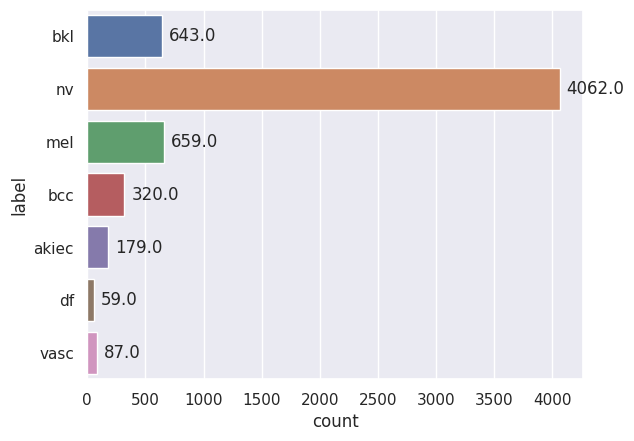

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric labels to class names
class_names = [classes[i][0] for i in range(len(classes))]
y_train_names = y_train.map({i: class_names[i] for i in range(len(class_names))})

# Set the style for better visibility
sns.set(style="darkgrid")

# Create the count plot with annotations
ax = sns.countplot(y=y_train_names)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_train,y_train  = oversample.fit_resample(x_train,y_train)

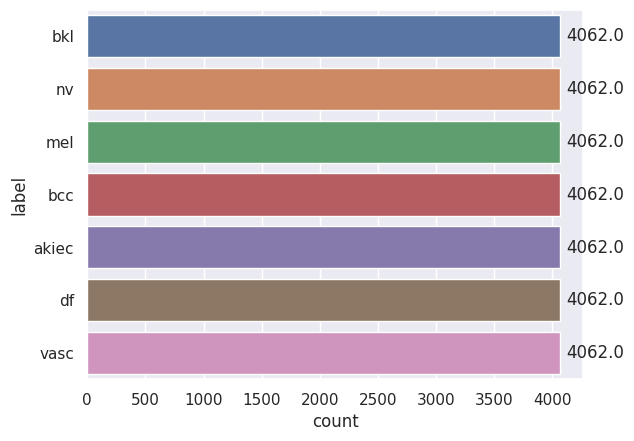

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric labels to class names
class_names = [classes[i][0] for i in range(len(classes))]
y_train_names = y_train.map({i: class_names[i] for i in range(len(class_names))})

# Set the style for better visibility
sns.set(style="darkgrid")

# Create the count plot with annotations
ax = sns.countplot(y=y_train_names)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.show()  # Display the plot


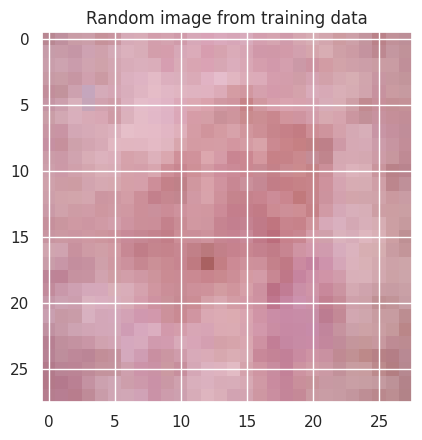

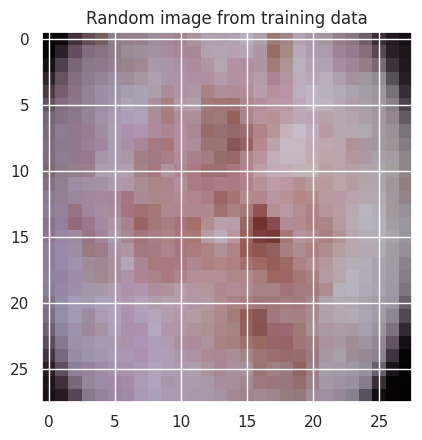

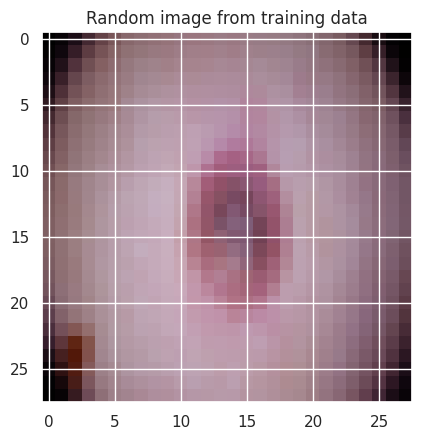

In [ ]:
import matplotlib.pyplot as plt
import random
num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Average, Flatten, Dropout, Dense, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.applications import ResNet50

# ResNet50-based model
input_resnet50 = Input(shape=(32, 32, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=input_resnet50)
for layer in base_model_resnet50.layers:
    layer.trainable = False
output_resnet50 = Sequential([
    base_model_resnet50,
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),   # Adjust the size if needed
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])(input_resnet50)
model_resnet50 = Model(inputs=input_resnet50, outputs=output_resnet50)

# Custom CNN model
model_custom_cnn = Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

# Combine the models using majority voting
input_combined = Input(shape=(32, 32, 3))
output_resnet50 = model_resnet50(input_combined)
output_custom_cnn = model_custom_cnn(input_combined)
ensemble_output = Average()([output_resnet50, output_custom_cnn])

# Build the ensemble model
ensemble_model = Model(inputs=input_combined, outputs=ensemble_output)

# Display the ensemble model summary
ensemble_model.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 model_3 (Functional)        (None, 7)                    2415763   ['input_9[0][0]']             
                                                          9                                       
                                                                                                  
 sequential_7 (Sequential)   (None, 7)                    700711    ['input_9[0][0]']             
                                                                                                  
 average (Average)           (None, 7)                    0         ['model_3[0][0]',       

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5',

    mode='max',
    verbose=1,
    save_best_only=True
)




In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Use learning_rate instead of lr
ensemble_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Resize images to (32, 32)
x_train_resized = tf.image.resize(x_train, (32, 32))

# Fit the model
history = ensemble_model.fit(x_train_resized,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[callback])

Epoch 1/50
178/178 [==============================] - ETA: 0s - loss: 1.0612 - accuracy: 0.6396
Epoch 1: val_loss improved from -inf to 2.33162, saving model to /content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


178/178 [==============================] - 39s 70ms/step - loss: 1.0612 - accuracy: 0.6396 - val_loss: 2.3316 - val_accuracy: 0.2639
Epoch 2/50
177/178 [============================>.] - ETA: 0s - loss: 0.5098 - accuracy: 0.8528
Epoch 2: val_loss did not improve from 2.33162
178/178 [==============================] - 7s 40ms/step - loss: 0.5090 - accuracy: 0.8531 - val_loss: 1.3523 - val_accuracy: 0.3923
Epoch 3/50
178/178 [==============================] - ETA: 0s - loss: 0.3561 - accuracy: 0.8967
Epoch 3: val_loss did not improve from 2.33162
178/178 [==============================] - 6s 36ms/step - loss: 0.3561 - accuracy: 0.8967 - val_loss: 1.3546 - val_accuracy: 0.4257
Epoch 4/50
177/178 [============================>.] - ETA: 0s - loss: 0.2951 - accuracy: 0.9123
Epoch 4: val_loss did not improve from 2.33162
178/178 [==============================] - 7s 38ms/step - loss: 0.2948 - accuracy: 0.9124 - val_loss: 0.9148 - val_accuracy: 0.5305
Epoch 5/50
178/178 [======================

In [ ]:
import pickle
with open('/content/drive/My Drive/Colab Notebooks/Skin Cancer/history_Res.pickle', 'wb') as file:
    pickle.dump(history.history, file)

In [ ]:
ensemble_model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer =optimizer,
              metrics = ['accuracy'])

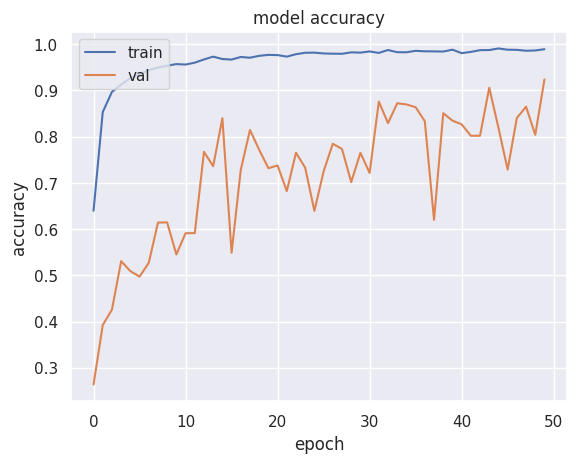

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#Assuming you have saved the history during training, load it here


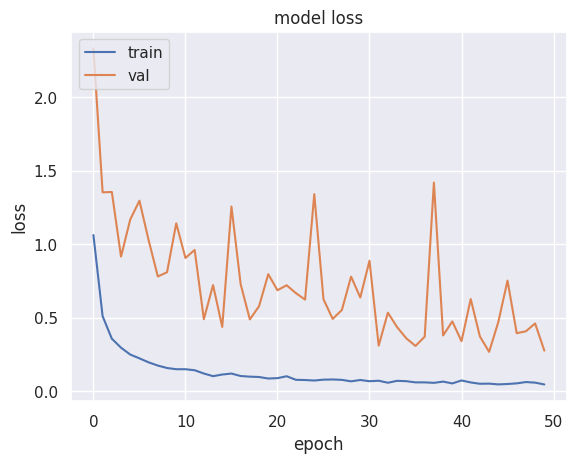

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
ensemble_model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_Res.h5')

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.metrics import confusion_matrix, classification_report
import PIL
# Resize images to (32, 32) for ResNet50
x_test_pixels = np.array(x_test).reshape(-1, 28, 28, 3)
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

# Evaluate the model
loss, acc = ensemble_model.evaluate(x_test_resized, y_test, verbose=2)

# Resize an example image for prediction
image = PIL.Image.open('/content/drive/MyDrive/Skin-Cancer-Classification/1234214.jpg')
image = image.resize((32, 32))
img = np.array(image).reshape(-1, 32, 32, 3)

# Make a prediction
result = ensemble_model.predict(img)
print(result[0])

# Convert the result to a list
result = result.tolist()

# Find the class with the maximum probability
max_prob = max(result[0])
class_ind = result[0].index(max_prob)
print(classes[class_ind])

# Resize the test set for confusion matrix and classification report
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

# Make predictions on the resized test set
y_pred = np.argmax(ensemble_model.predict(x_test_resized), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


126/126 - 4s - loss: 1.3481 - accuracy: 0.5829 - 4s/epoch - 35ms/step
1/1 [==============================] - 2s 2s/step
[0.29336414 0.25472134 0.14401402 0.07744552 0.0175036  0.1855936
 0.02735779]
('akiec', 'actinic keratoses and intraepithelial carcinomae')
126/126 [==============================] - 4s 15ms/step
Confusion Matrix:
[[ 111   25    8    3    1    0    0]
 [  79   97   10    1    6    1    0]
 [ 157   92  147   10   49    1    0]
 [  31    9    2   12    2    0    0]
 [ 301  133  186   36 1954   33    0]
 [  13   13    5    1    9   14    0]
 [ 150   39  123    1  138    3    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.13      0.75      0.22       148
           1       0.24      0.50      0.32       194
           2       0.31      0.32      0.31       456
           3       0.19      0.21      0.20        56
           4       0.91      0.74      0.81      2643
           5       0.27      0.25      0.26      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


cuda:0


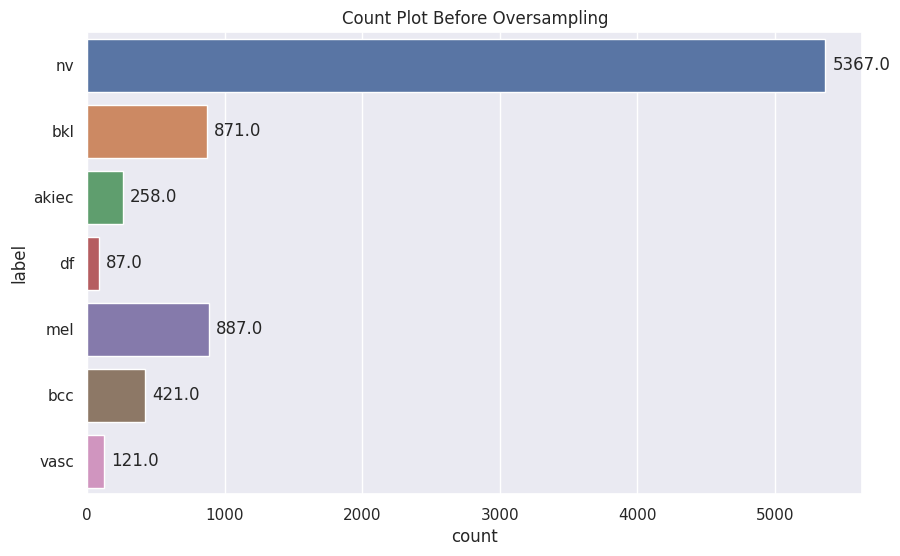

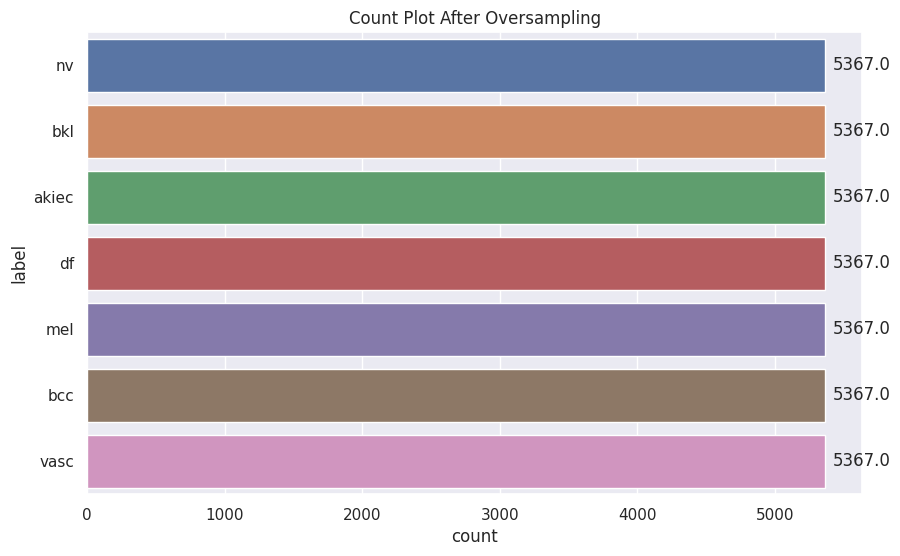

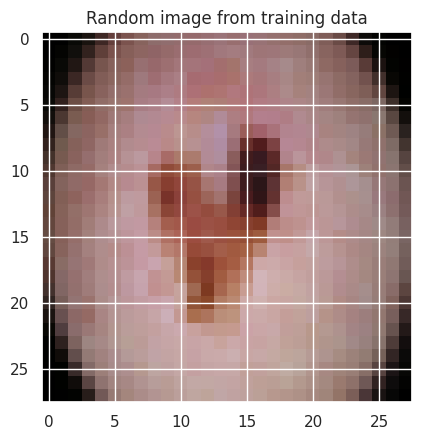

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 model_4 (Functional)        (None, 7)                    2415763   ['input_6[0][0]']             
                                                          9                                       
                                                                                                  
 sequential_5 (Sequential)   (None, 7)                    700711    ['input_6[0][0]']             
                                                                                                  
 average_2 (Average)         (None, 7)                    0         ['model_4[0][0]',       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


294/294 [==============================] - 22s 39ms/step - loss: 1.0274 - accuracy: 0.6371 - val_loss: 1.2522 - val_accuracy: 0.5265
Epoch 2/50
294/294 [==============================] - ETA: 0s - loss: 0.5174 - accuracy: 0.8323
Epoch 2: val_loss did not improve from 1.25219
294/294 [==============================] - 10s 34ms/step - loss: 0.5174 - accuracy: 0.8323 - val_loss: 0.9526 - val_accuracy: 0.6813
Epoch 3/50
294/294 [==============================] - ETA: 0s - loss: 0.3617 - accuracy: 0.8872
Epoch 3: val_loss did not improve from 1.25219
294/294 [==============================] - 9s 31ms/step - loss: 0.3617 - accuracy: 0.8872 - val_loss: 0.9872 - val_accuracy: 0.6793
Epoch 4/50
293/294 [============================>.] - ETA: 0s - loss: 0.2913 - accuracy: 0.9108
Epoch 4: val_loss did not improve from 1.25219
294/294 [==============================] - 11s 38ms/step - loss: 0.2913 - accuracy: 0.9108 - val_loss: 1.0017 - val_accuracy: 0.6633
Epoch 5/50
293/294 [====================

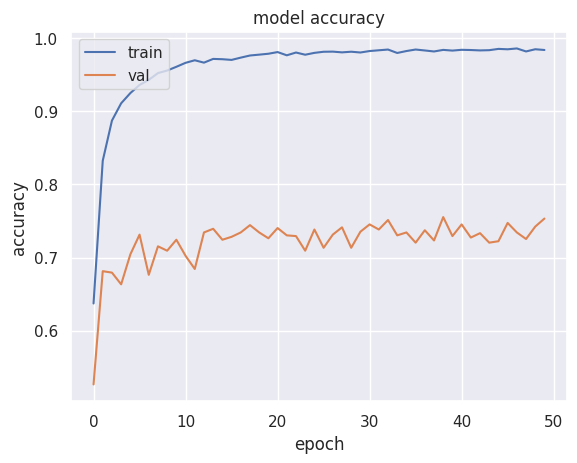

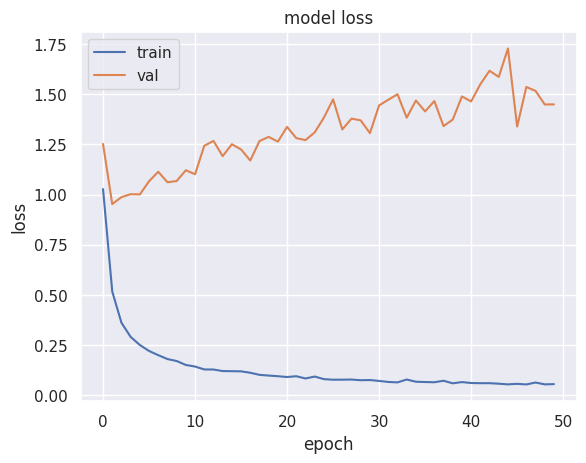

32/32 - 1s - loss: 1.6849 - accuracy: 0.7056 - 552ms/epoch - 17ms/step
Test Loss: 1.6848634481430054, Test Accuracy: 0.7055888175964355
32/32 [==============================] - 2s 17ms/step
Confusion Matrix:
[[  6   8   2   0  10   0   4]
 [  7  31   3   1  11   0   2]
 [  6  10  35   0  52   1  11]
 [  1   4   2   1   4   0   0]
 [  2  16  10   1 584   8  43]
 [  0   1   1   0   2   8   1]
 [  8   3  12   0  48   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20        30
           1       0.42      0.56      0.48        55
           2       0.54      0.30      0.39       115
           3       0.33      0.08      0.13        12
           4       0.82      0.88      0.85       664
           5       0.47      0.62      0.53        13
           6       0.41      0.37      0.39       113

    accuracy                           0.71      1002
   macro avg       0.46      0.43      0.43      1002
weighted

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Average, Flatten, Dropout, Dense, BatchNormalization, Conv2D, MaxPool2D
import PIL
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths
train_path = '/content/drive/MyDrive/DL/train_data.csv'
valid_path = '/content/drive/MyDrive/DL/valid_data.csv'
test_path = '/content/drive/MyDrive/DL/test_data.csv'

# Load the dataset
train_set = pd.read_csv(train_path)
valid_set = pd.read_csv(valid_path)
test_set = pd.read_csv(test_path)

# Define classes
classes = {
    0: ('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1: ('bcc', 'basal cell carcinoma'),
    2: ('bkl', 'benign keratosis-like lesions'),
    3: ('df', 'dermatofibroma'),
    4: ('nv', 'melanocytic nevi'),
    5: ('vasc', 'pyogenic granulomas and hemorrhage'),
    6: ('mel', 'melanoma'),
}

# Extract labels and features from train, validation, and test sets
y_train = train_set['label']
x_train = train_set.drop(columns=['label'])

y_valid = valid_set['label']
x_valid = valid_set.drop(columns=['label'])

y_test = test_set['label']
x_test = test_set.drop(columns=['label'])

columns = list(x_train)

import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Map numeric labels to class names
class_names = [classes[i][0] for i in range(len(classes))]
y_train_names = y_train.map({i: class_names[i] for i in range(len(class_names))})

# Set the style for better visibility
sns.set(style="darkgrid")

# Display count plot before oversampling
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=y_train_names)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Count Plot Before Oversampling')
plt.show()

# Oversample to handle class imbalance in the training set
oversample = RandomOverSampler()
x_train, y_train = oversample.fit_resample(x_train, y_train)

# Map numeric labels to class names after oversampling
y_train_names = y_train.map({i: class_names[i] for i in range(len(class_names))})

# Display count plot after oversampling
plt.figure(figsize=(10, 6))
ax = sns.countplot(y=y_train_names)
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')
plt.title('Count Plot After Oversampling')
plt.show()

# Display random images from the training data
num = np.random.randint(0, len(x_train))
x_train = np.array(x_train, dtype=np.uint8).reshape(-1, 28, 28, 3)
plt.imshow(x_train[num].reshape(28, 28, 3))
plt.title("Random image from training data")
plt.show()

# Load the ResNet50 model
input_resnet50 = Input(shape=(32, 32, 3))
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_tensor=input_resnet50)
for layer in base_model_resnet50.layers:
    layer.trainable = False
output_resnet50 = Sequential([
    base_model_resnet50,
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])(input_resnet50)
model_resnet50 = Model(inputs=input_resnet50, outputs=output_resnet50)

# Custom CNN model
model_custom_cnn = Sequential([
    Conv2D(16, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(7, activation='softmax')
])

# Combine the models using model averaging
input_combined = Input(shape=(32, 32, 3))
output_resnet50 = model_resnet50(input_combined)
output_custom_cnn = model_custom_cnn(input_combined)
ensemble_output = Average()([output_resnet50, output_custom_cnn])

# Build the ensemble model
ensemble_model = Model(inputs=input_combined, outputs=ensemble_output)

# Display the ensemble model summary
ensemble_model.summary()

# Model Checkpoint callback
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_ensemb.h5',
    mode='max',
    verbose=1,
    save_best_only=True
)

# Model compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
ensemble_model.compile(loss='sparse_categorical_crossentropy',
                      optimizer=optimizer,
                      metrics=['accuracy'])

# Resize images to (32, 32) for training and validation sets
x_train_resized = tf.image.resize(x_train, (32, 32))
x_valid_resized = tf.image.resize(np.array(x_valid, dtype=np.uint8).reshape(-1, 28, 28, 3), (32, 32))

# Model training
history = ensemble_model.fit(x_train_resized,
                             y_train,
                             validation_data=(x_valid_resized, y_valid),
                             batch_size=128,
                             epochs=50,
                             shuffle=True,
                             callbacks=[callback])

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Load the best model weights
ensemble_model.load_weights('/content/drive/My Drive/Colab Notebooks/Skin Cancer/best_model_ensemb.h5')

# Evaluate the model on the test set
x_test_pixels = np.array(x_test).reshape(-1, 28, 28, 3)
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

loss, acc = ensemble_model.evaluate(x_test_resized, y_test, verbose=2)
print(f'Test Loss: {loss}, Test Accuracy: {acc}')



# Resize the test set for confusion matrix and classification report
x_test_resized = np.array([img_to_array(array_to_img(x, scale=False).resize((32, 32))) for x in x_test_pixels])

# Make predictions on the resized test set
y_pred = np.argmax(ensemble_model.predict(x_test_resized), axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
